In [150]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import cluster, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

new_dimension = 50
n_relations = 25

In [67]:
print('Importing embeddings...')

conv = np.load('/users/daychman/Internship_SBERT/files/conversion2.npy')
labels = np.load('/users/daychman/Internship_SBERT/files/concat_labels.npy')
embeddings = np.load('/users/daychman/Internship_SBERT/files/concat_embeddings.npy')

Importing embeddings...


In [138]:
conv

array([['2', 'broader'],
       ['3', 'evaluatesMaterial'],
       ['4', 'evaluatesMethod'],
       ['6', 'evaluatesOtherEntity'],
       ['7', 'evaluatesTask'],
       ['8', 'improvesMethod'],
       ['9', 'improvesMetric'],
       ['10', 'improvesTask'],
       ['11', 'includesMaterial'],
       ['12', 'includesMethod'],
       ['13', 'includesOtherEntity'],
       ['14', 'includesTask'],
       ['16', 'narrower'],
       ['17', 'predictsMaterial'],
       ['19', 'predictsOtherEntity'],
       ['20', 'providesMaterial'],
       ['22', 'requiresTask'],
       ['24', 'supportsMethod'],
       ['25', 'supportsOtherEntity'],
       ['26', 'supportsTask'],
       ['27', 'usesMaterial'],
       ['28', 'usesMethod'],
       ['29', 'usesMetric'],
       ['30', 'usesOtherEntity'],
       ['31', 'usesTask']], dtype='<U21')

In [82]:
# convert a 2D array conv into a dictionary
conv_dict = {}
for i in range(len(conv)):
    conv_dict[conv[i][0]] = conv[i][1]

In [5]:
print('Calculating PCA...')

#Compute PCA on the train embeddings matrix
pca = PCA(n_components=new_dimension)
pca.fit(embeddings)
transformed = pca.transform(embeddings)

Calculating PCA...


/users/daychman/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


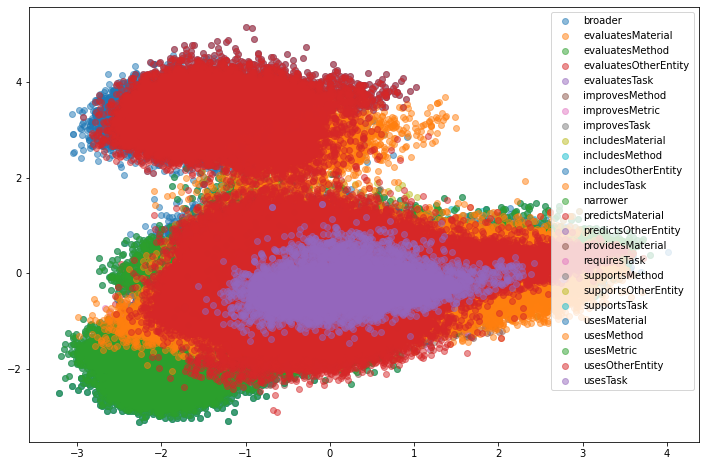

In [141]:
# n = 1000
# plt.rcParams['figure.figsize'] = [12, 8]

# visualize the top 2 principal components
fig, ax = plt.subplots()
# make a scatter graph for each label
for i in conv_dict.keys():
    ax.scatter(transformed[labels == int(i), 0], transformed[labels == int(i), 1], label=conv_dict[i], alpha=0.5)
ax.legend()
plt.show()



In [ ]:
print('Clustering...')

kmeans = KMeans(n_clusters=n_relations).fit(transformed)

In [171]:
['2',  '3',  '4',  '6',  '7',  '8',  '9',  '10',  '11',  '12',  '13',  '14',  '16',  '17',  '19',  '20',  '22',  '24',  '25',  '26',  '27',  '28',  '29',  '30',  '31']

ordered_labels = {i:int(conv[i, 0]) for i in range(len(conv[:, 0]))}
corrected_labels = [ordered_labels[i] for i in kmeans.labels_]


In [173]:
print('Calculating the score...')
def purity_score(y_true, y_pred):
    contingency_matrix = cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

print(purity_score(labels, kmeans.labels_))

Calculating the score...
0.4407833094519476


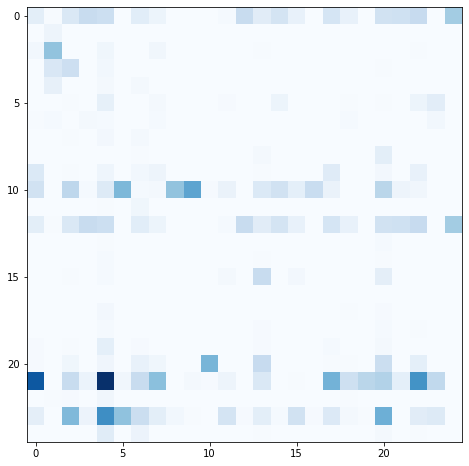

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(labels, corrected_labels)
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)


In [182]:
import plotly.express as pl

pl.

[17, 17, 7, 7, 27, 27, 7, 7, 29, 24]
[16  2  2 16 11 11 30 30 28 28]
